In [63]:
import pandas as pd
import numpy as np
import csv

In [64]:
users = pd.read_csv('user.csv', sep=",", skiprows =[0], header = None, names=["userId", "Age", "Status", "Genre"])
users.head()

,userId,Age,Status,Genre
0,1,23,1,0
1,2,19,1,0
2,3,19,1,1
3,4,19,1,0
4,5,20,1,1


In [65]:
visited = pd.read_csv('visited.csv', sep=",", skiprows =[0], header = None)
visited.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0,0,1,1,1,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
1,1,0,1,1,0,0,1,0,1,1,...,0,0,1,1,1,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,1,1,...,1,0,1,1,1,1,1,1,1,1


In [66]:
def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

visited_val = visited.values

places = [duplicates(n, 1) for n in visited_val]

len(places)

62

In [67]:
users_val = users.values.tolist()
len(users_val)

62

In [68]:
#sacamos el 10% inferior de ambas listas (los 6 ultimos datos)

test_users = users_val[-6:]
test_visit = places[-6:]

test_visit

[[0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  11,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  26,
  27,
  28,
  33],
 [2, 3, 4, 8, 15, 18, 20, 26, 27, 28],
 [0, 3, 7, 8, 10, 19, 29],
 [2, 3, 4, 10, 15, 16, 19, 20],
 [0, 2, 3, 4, 10, 15, 16, 19, 20, 23, 26, 27],
 [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 19, 20, 24, 27]]

In [69]:
#ahora corremos el modelo y comparamos los resultados

import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="recsys.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

predicted = []

for elem in test_users:
    input_data = np.array([elem[-3:]], dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted.append(output_data)

In [122]:
aux = []
for elem in predicted:
    aux.append(elem[0][0].tolist())

In [123]:
def toint(lst):
    return [int(e) for e in lst]

aux = [toint(e) for e in aux]

aux = [e[:30] for e in aux]

In [124]:
#aux contiene los lugares recomendados para cada uno
aux

[[29,
  7,
  22,
  9,
  12,
  31,
  28,
  17,
  23,
  5,
  13,
  33,
  32,
  0,
  30,
  24,
  14,
  25,
  6,
  27,
  21,
  18,
  11,
  26,
  19,
  2,
  20,
  15,
  10,
  16],
 [1,
  16,
  20,
  11,
  22,
  32,
  25,
  18,
  13,
  14,
  33,
  24,
  31,
  5,
  29,
  0,
  7,
  12,
  3,
  4,
  10,
  15,
  2,
  9,
  21,
  28,
  17,
  8,
  19,
  30],
 [1,
  4,
  16,
  10,
  14,
  9,
  13,
  3,
  15,
  2,
  6,
  11,
  7,
  17,
  0,
  24,
  12,
  25,
  5,
  8,
  26,
  20,
  27,
  21,
  23,
  28,
  33,
  29,
  19,
  18],
 [1,
  0,
  19,
  1,
  0,
  26,
  1,
  0,
  28,
  1,
  1,
  31,
  0,
  0,
  21,
  1,
  0,
  25,
  1,
  1,
  20,
  1,
  0,
  22,
  1,
  0,
  20,
  1,
  1,
  23],
 [1,
  4,
  16,
  10,
  14,
  9,
  13,
  3,
  15,
  2,
  6,
  11,
  7,
  17,
  0,
  24,
  12,
  25,
  5,
  8,
  26,
  20,
  27,
  21,
  23,
  28,
  33,
  29,
  19,
  18],
 [29,
  22,
  31,
  7,
  28,
  23,
  17,
  9,
  32,
  33,
  30,
  0,
  5,
  12,
  14,
  13,
  21,
  24,
  18,
  6,
  25,
  27,
  11,
  26,
  19,
  2,


In [125]:
#ahora probamos el accuracy de nuestros datos comparando cuantos elementos predichos estan en la data real
present = []
for j in range(len(test_visit)):
    present.append([i for i in test_visit[j] if i in aux[j]])

In [126]:
present

[[0,
  2,
  5,
  6,
  7,
  11,
  12,
  14,
  15,
  16,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  26,
  27,
  28,
  33],
 [2, 3, 4, 8, 15, 18, 20, 28],
 [0, 3, 7, 8, 10, 19, 29],
 [19, 20],
 [0, 2, 3, 4, 10, 15, 16, 19, 20, 23, 26, 27],
 [2, 5, 6, 8, 9, 10, 11, 12, 14, 16, 17, 19, 24, 27]]

In [127]:
acc = [len(present[i])/len(test_visit[i]) for i in range(len(test_visit))]
acc

[0.875, 0.8, 1.0, 0.25, 1.0, 0.8235294117647058]

In [128]:
#luego vemos en promedio el valor de nuestro accuracy
print(np.mean(acc))

0.7914215686274509


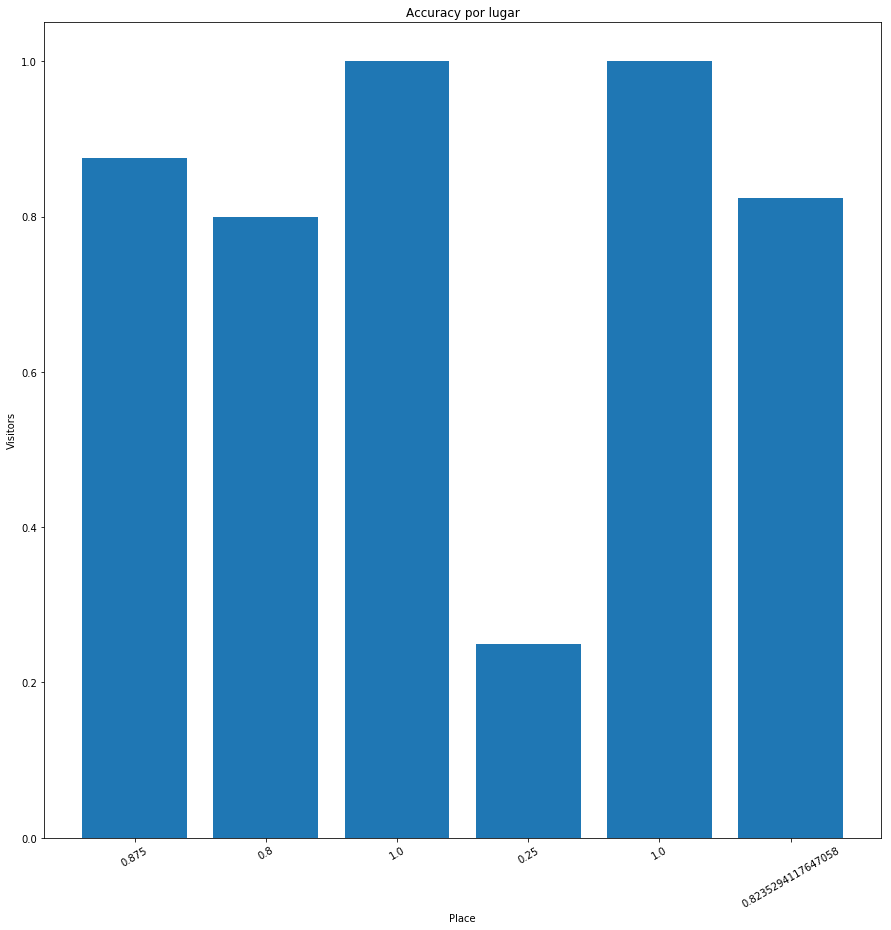

In [129]:
import matplotlib.pyplot as plt

index = np.arange(len(acc))
plt.bar(index, acc)
plt.xlabel('Place', fontsize=10)
plt.ylabel('Visitors', fontsize=10)
plt.xticks(index, acc, fontsize=10, rotation=30)
plt.title('Accuracy por lugar')
plt.rcParams["figure.figsize"]=15,15
plt.show()